<a href="https://colab.research.google.com/github/kangel429/DeepLearning/blob/master/Lesson6_pets_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Deep Learning for Coders, v3

# Lesson6_pets_more

# pets revisited
# 宠物分类问题回顾

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [ ]:
bs = 64             #배치사이즈 64장씩

In [ ]:
path = untar_data(URLs.PETS)/'images'      #위치 

In [ ]:
!ls '/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_128.jpg'

Abyssinian_100.jpg		   keeshond_186.jpg
Abyssinian_100.mat		   keeshond_187.jpg
Abyssinian_101.jpg		   keeshond_188.jpg
Abyssinian_101.mat		   keeshond_189.jpg
Abyssinian_102.jpg		   keeshond_18.jpg
Abyssinian_102.mat		   keeshond_190.jpg
Abyssinian_103.jpg		   keeshond_191.jpg
Abyssinian_104.jpg		   keeshond_192.jpg
Abyssinian_105.jpg		   keeshond_193.jpg
Abyssinian_106.jpg		   keeshond_194.jpg
Abyssinian_107.jpg		   keeshond_195.jpg
Abyssinian_108.jpg		   keeshond_196.jpg
Abyssinian_109.jpg		   keeshond_197.jpg
Abyssinian_10.jpg		   keeshond_198.jpg
Abyssinian_110.jpg		   keeshond_199.jpg
Abyssinian_111.jpg		   keeshond_19.jpg
Abyssinian_112.jpg		   keeshond_1.jpg
Abyssinian_113.jpg		   keeshond_200.jpg
Abyssinian_114.jpg		   keeshond_20.jpg
Abyssinian_115.jpg		   keeshond_21.jpg
Abyssinian_116.jpg		   keeshond_22.jpg
Abyssinian_117.jpg		   keeshond_23.jpg
Abyssinian_118.jpg		   keeshond_24.jpg
Abyssinian_119.jpg		   keeshond_25.jpg
Abyssinian_11.jpg		   keeshond_26.jpg
Abyssinian_12

## Data augmentation 数据增强

In [ ]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,     #학습할 이미지의 형태가 어떤지  max_rotate: 얼마나 회전 max_zoom: 최대 확대 크기 max_warp: 이미지 왜곡 p_lighting: 조명 관련해서
                      p_affine=1., p_lighting=1.)

In [ ]:
doc(get_transforms)           #get_transforms 함수 조사

In [ ]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)      #이미지리스는 폴더로부터 가지고오고, 20프로 검증 데이터로 분류 

In [ ]:
def get_data(size, bs, padding_mode='reflection'):          #패딩 모드
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')            #라베링 작업
           .transform(tfms, size=size, padding_mode=padding_mode)   #이미지 형태
           .databunch(bs=bs).normalize(imagenet_stats))       #노멀라이징하기

In [ ]:
data = get_data(224, bs, 'zeros')                     #224이미지 사이즈 bs 배치사이즈  padding_mode =zeros

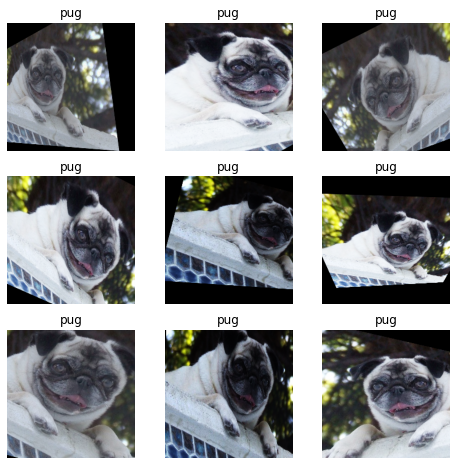

In [ ]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]            
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))         #이미지 3개  가로 세로 3  

In [ ]:
data = get_data(224,bs)                     

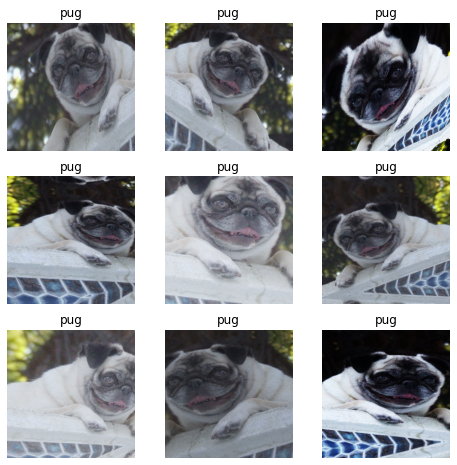

In [ ]:
plot_multi(_plot, 3, 3, figsize=(8,8))

## Train a model 训练网络

In [ ]:
gc.collect()          
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True) # 데이터를 가지고, 34모델, 오류를 분석할 수 있는 신경망 생성

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(3, slice(1e-2), pct_start=0.8)          # 3번 학습  1e-2속도  pct_start=  한주기 동안 학습률이 상승 할 때 총 에포크 수의 백분율입니다.

epoch,train_loss,valid_loss,error_rate,time
0,1.645357,0.384944,0.101489,01:50
1,0.975578,0.303011,0.094723,01:51
2,0.719810,0.272720,0.085927,01:51


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.568570,0.270981,0.076455,01:59
1,0.538293,0.271949,0.075101,01:58


In [ ]:
data = get_data(352,bs)                     
learn.data = data                # 이미지 사이즈 크게 늘려서 학습 -->학습 효과를 높이기 위해

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.496564,0.250226,0.062923,03:37
1,0.473545,0.249943,0.062923,03:35


In [ ]:
learn.save('352')

## Convolution kernel 卷积核

In [ ]:
data = get_data(352,16)                   # 배치 수를 줄임

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True).load('352')   # 데이터를 가지고, 34모델, 오류를 분석할 수 있는 신경망 생성

Category samoyed

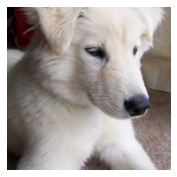

In [ ]:
idx=0
x,y = data.valid_ds[idx]    #valid_ds 검증할 이미지소스를 가지고 옴
x.show()                    #보여줌
data.valid_ds.y[idx]        #Category newfoundland

In [ ]:
k = tensor([                        #9개의 커널 생성
    [0.  ,-5/3,1],
    [-5/3,-5/3,1],
    [1.  ,1   ,1],
]).expand(1,3,3,3)/6

In [ ]:
k

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]])

In [ ]:
k.shape               

torch.Size([1, 3, 3, 3])

In [ ]:
t = data.valid_ds[0][0].data; t.shape

torch.Size([3, 352, 352])

In [ ]:
t[None].shape

torch.Size([1, 3, 352, 352])

In [ ]:
edge = F.conv2d(t[None], k)       #커널하고 난 후의 값

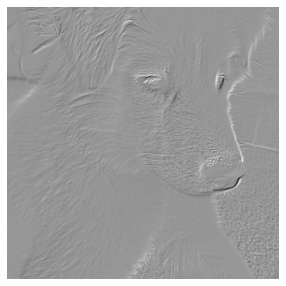

In [ ]:
show_image(edge[0], figsize=(5,5));   #커널 적용된 이미지 보여주기

In [ ]:
data.c

37

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
print(learn.summary())      #모델에 관해 요약

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 176, 176]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 176, 176]       128        True      
______________________________________________________________________
ReLU                 [64, 176, 176]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 88, 88]         128        True      
______________________________________________________________________
ReLU                 [64, 88, 88]         0          False     
___________________________________________________

## Heatmap 热力图

In [ ]:
m = learn.model.eval();       #평가하는 과정에서는 모든 노드를 사용하겠다는 의미 -----드롭아웃 및 배치 정규화를 평가 모드로 설정하여야 합니다. 이것을 하지 않으면 추론 결과가 일관성 없게 출력됩니다

In [ ]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])     # 역정규화는 이전에 정규화된 데이터베이스에서 성능을 개선하기 위해 사용되는 전략
xb = xb.cuda()

In [ ]:
from fastai.callbacks.hooks import *

In [ ]:
def hooked_backward(cat=y):               #Heatmap은 학습할 때 어디를 중점적으로 보며 학습을 했는지 알려준다
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [ ]:
hook_a,hook_g = hooked_backward()

In [ ]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [ ]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [ ]:
def show_heatmap(hm):             # Heatmap을 보여주는 함수
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');

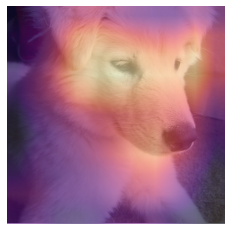

In [ ]:
show_heatmap(avg_acts)

## Grad-CAM

Paper: [Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391) <br><br>
论文: [Grad-CAM: 基于神经网络梯度局部化的可视化解释](https://arxiv.org/abs/1610.02391)

In [ ]:
grad = hook_g.stored[0][0].cpu()
grad_chan = grad.mean(1).mean(1)
grad.shape,grad_chan.shape

(torch.Size([512, 11, 11]), torch.Size([512]))

In [ ]:
mult = (acts*grad_chan[...,None,None]).mean(0)

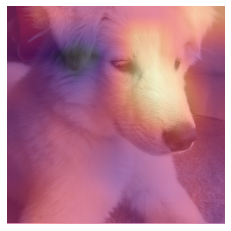

In [ ]:
show_heatmap(mult)

In [ ]:
fn = '/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_128.jpg' #검증할 사진 가지고 오기

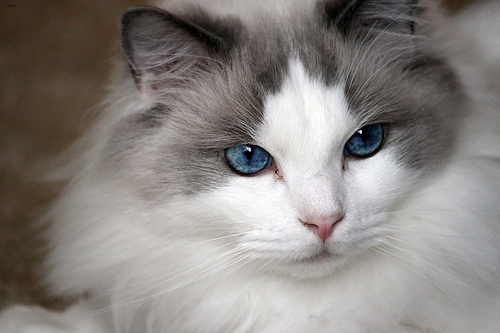

In [ ]:
x = open_image(fn); x

In [ ]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [ ]:
hook_a,hook_g = hooked_backward()

In [ ]:
acts = hook_a.stored[0].cpu()
grad = hook_g.stored[0][0].cpu()

grad_chan = grad.mean(1).mean(1)
mult = (acts*grad_chan[...,None,None]).mean(0)

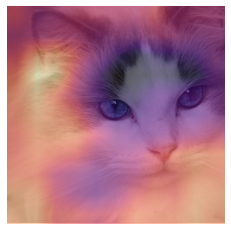

In [ ]:
show_heatmap(mult)      #Heatmap으로 보여주기

In [ ]:
data.classes[0]

'Abyssinian'

In [ ]:
hook_a,hook_g = hooked_backward(0)

In [ ]:
acts = hook_a.stored[0].cpu()
grad = hook_g.stored[0][0].cpu()

grad_chan = grad.mean(1).mean(1)
mult = (acts*grad_chan[...,None,None]).mean(0)

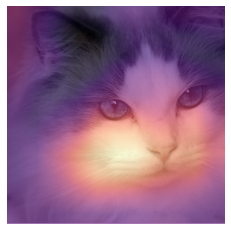

In [ ]:
show_heatmap(mult)

*이 고양이 이미지와 첫째 했던 heatmap 왜 다른건가 ?*